In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

bike_df = pd.read_csv('./train.csv')
print(bike_df.shape)
bike_df.head(3)

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [4]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [5]:
# 문자열로 되어 있는 datetime 피처값을 datetime 타입으로 변환
# bike_df['datetime']=bike_df['datetime'].apply(함수명)
bike_df['datetime']=bike_df.datetime.apply(pd.to_datetime)
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [6]:
# year feature 새로 생성
bike_df['year']=bike_df.datetime.apply(lambda x:x.year)
bike_df['year']

0        2011
1        2011
2        2011
3        2011
4        2011
         ... 
10881    2012
10882    2012
10883    2012
10884    2012
10885    2012
Name: year, Length: 10886, dtype: int64

In [7]:
bike_df['month']=bike_df.datetime.apply(lambda x:x.month)
bike_df['day']=bike_df.datetime.apply(lambda x:x.day)
bike_df['hour']=bike_df.datetime.apply(lambda x:x.hour)

bike_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


In [8]:
# 불필요한 3개 피처 삭제
drop_columns=['datetime', 'casual', 'registered']
bike_df.drop(
    drop_columns,
    axis=1,
    inplace=True
)
bike_df.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'count', 'year', 'month', 'day', 'hour'],
      dtype='object')

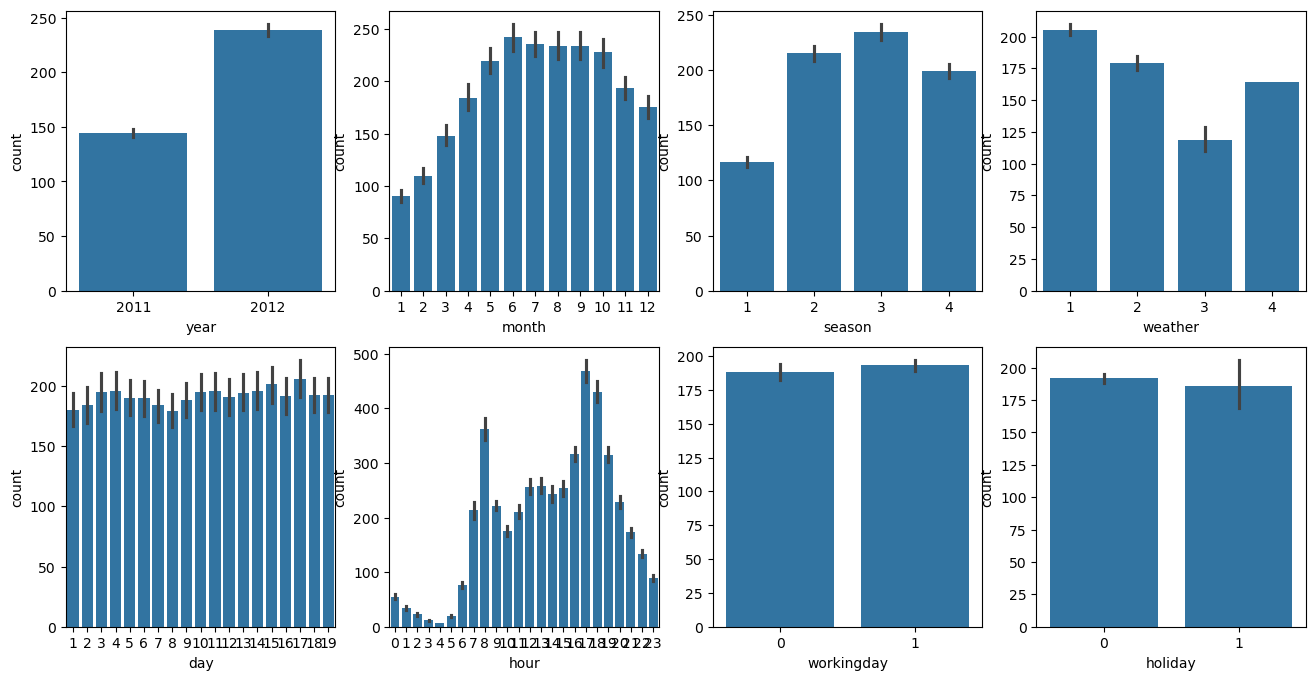

In [9]:
# 피처의 분포 확인
# 범주형 데이터
cat_features=['year','month','season','weather','day','hour','workingday','holiday']
# 막대그래프로 분포 확인

fig, axs=plt.subplots(figsize=(16,8), ncols=4, nrows=2)

for i, feature in enumerate(cat_features):
    row=int(i/4)
    col=i%4 #  [0,1,2,3,4,5,6,7]
    sns.barplot(
        data=bike_df, # DataFrame
        x=feature, # 'year'
        y='count', # dataframe 에서 추출
        ax=axs[row][col]
    )

plt.show()


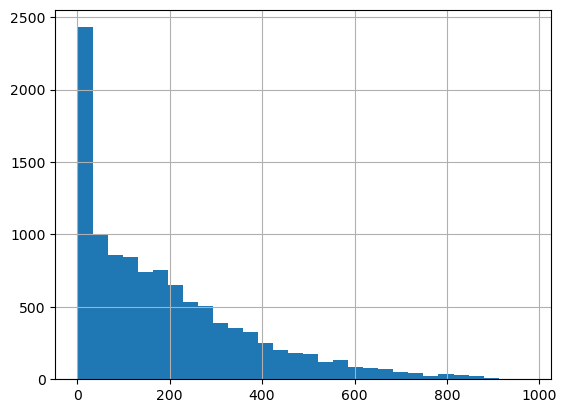

In [10]:
bike_df['count'].hist(bins=30)
plt.show()

In [11]:
# 평가 지표 계산하는 함수 선언
from sklearn.metrics import mean_squared_error, mean_absolute_error

def rmsle(y,pred):
    log_y=np.log1p(y)
    log_pred=np.log1p(pred)
    squared_error=(log_y-log_pred)**2
    rmsle=np.sqrt(np.mean(squared_error))
    return rmsle

def rmse(y,pred):
    return np.sqrt(np.mean(mean_squared_error(y,pred)))

def evaluate_regr(y,pred):
    rmsle_=rmsle(y,pred)
    rmse_=rmse(y,pred)
    mae_val=mean_absolute_error(y,pred)
    print(f'RMSLE : {rmsle_:.3f}, RMSE : {rmse_:.3f}, MAE : {mae_val:.3f}')

In [12]:
# 전처리 없이 모델 생성하고 학습하고 평가
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# 데이터와 레이블 분리
y_target=bike_df['count']
X_features=bike_df.drop(['count'], axis=1, inplace=False)

# 학습/테스트 분리
X_train, X_test, y_train, y_test=\
    train_test_split(
        X_features,
        y_target,
        test_size=0.3,
        random_state=0
    )

# 모델 생성 : LinearRegression() : 단순 선형회귀 모델(규제없다)
lr_reg=LinearRegression()
# 학습
lr_reg.fit(X_train, y_train)
# 예측값 추출
pred=lr_reg.predict(X_test)

evaluate_regr(y_test, pred)

RMSLE : 1.165, RMSE : 140.900, MAE : 105.924


In [13]:
# 실제 데이터로 위 오차가 왜 나왔는지 확인
# ry_test=y_test[:10] # Series : 6638 시작
# py_test=pred[:10] # array : 0부터시작
# diff=ry_test-py_test
# ry_test.index, y_test[:10].index, pred[:10]
# for i,idx in enumerate(ry_test.index):
#     print(f'실제대여수 : {ry_test[idx]}, \
#         예측대여수: {py_test[i]}, 차이 : {diff[idx]}')

In [14]:
# 오차 상위 N개(정렬) 확인 함수 
def get_top_error_data(y_test, pred, n_tops=5):
    result_df=pd.DataFrame(y_test.values, columns=['real_count'])
    result_df['predicted_count']=np.round(pred)
    result_df['diff']=\
        np.abs(result_df['real_count']-result_df['predicted_count'])
    print(result_df.sort_values('diff', ascending=False)[:n_tops])

get_top_error_data(y_test, pred)

      real_count  predicted_count   diff
1618         890            322.0  568.0
3151         798            241.0  557.0
966          884            327.0  557.0
412          745            194.0  551.0
2277         813            267.0  546.0


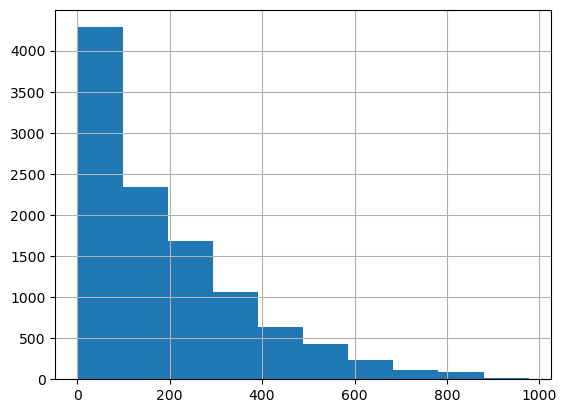

In [15]:
# type(y_target) # Series hist method
y_target.hist()
plt.show()

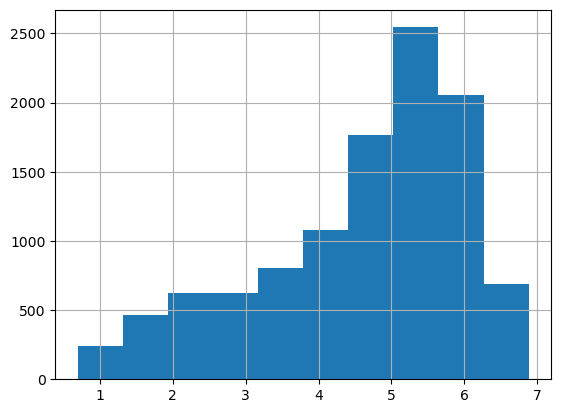

In [16]:
y_log_transform=np.log1p(y_target)
# type(y_log_transform)
y_log_transform.hist()
plt.show()

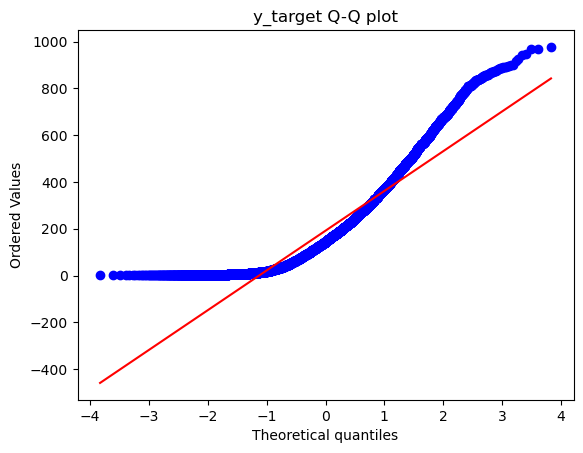

In [17]:
# 시각화  QQ plot, 정량화된 값을 확인 : shapiro value 
import scipy.stats as stats
stats.probplot(y_target, dist='norm', plot=plt) # plot= sns, plt 사용할지 선택
plt.title('y_target Q-Q plot')
plt.show()


In [18]:
from scipy.stats import shapiro

stat, p=shapiro(y_target)

if p>0.05:
    print('정규분포 따른다, 로그변환 안한다')
else:
    print(f'P-value : {p:.3f}, 정규분포 안 따른다. 로그변환 필요')

P-value : 0.000, 정규분포 안 따른다. 로그변환 필요


c:\ProgramData\anaconda3\envs\pyml\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10886.
  res = hypotest_fun_out(*samples, **kwds)


In [19]:
# target log
y_target_log=np.log1p(y_target)

X_train, X_test, y_train, y_test=\
    train_test_split(
        X_features,
        y_target_log,
        test_size=0.3,
        random_state=0
    )
    
lr_reg=LinearRegression()
lr_reg.fit(X_train, y_train)
pred=lr_reg.predict(X_test)

# 예측 대여 대수 로그값을 가지고 있다 => 지수함수 사용
y_test_exp=np.expm1(y_test) # y_test log => 원래 대수 변경
pred_exp=np.expm1(pred)

evaluate_regr(y_test_exp, pred_exp)


RMSLE : 1.017, RMSE : 162.594, MAE : 109.286


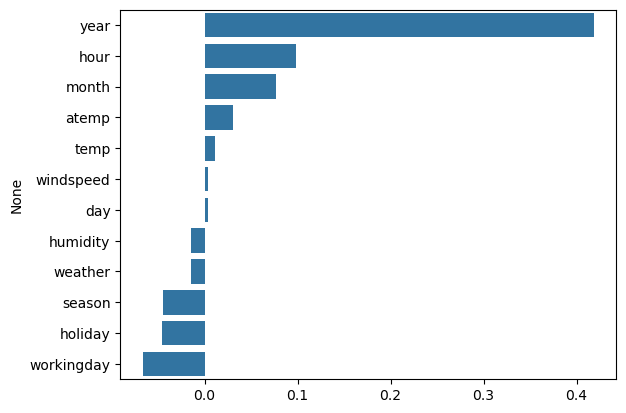

In [20]:
# 계수값들을 확인 : 어떤 피처가 중요한 역할 파악
coef_=pd.Series(lr_reg.coef_, index=X_features.columns)
coef_sort=coef_.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)
plt.show()

In [27]:
columns=\
    ['year','month','day','hour','holiday','workingday','season','weather']
X_features_ohe=pd.get_dummies(
    X_features, # 전체 데이터를 원핫 처리
    columns=columns
)
# X_features_ohe.shape, X_features.shape, X_features_ohe.columns
X_features_ohe.head()

,temp,atemp,humidity,windspeed,year_2011,year_2012,month_1,month_2,month_3,month_4,...,workingday_0,workingday_1,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,9.84,14.395,81,0.0,True,False,True,False,False,False,...,True,False,True,False,False,False,True,False,False,False
1,9.02,13.635,80,0.0,True,False,True,False,False,False,...,True,False,True,False,False,False,True,False,False,False
2,9.02,13.635,80,0.0,True,False,True,False,False,False,...,True,False,True,False,False,False,True,False,False,False
3,9.84,14.395,75,0.0,True,False,True,False,False,False,...,True,False,True,False,False,False,True,False,False,False
4,9.84,14.395,75,0.0,True,False,True,False,False,False,...,True,False,True,False,False,False,True,False,False,False


In [28]:

# 분리
X_train, X_test, y_train, y_test=\
    train_test_split(
        X_features_ohe, # 전체데이터 (10886,12)
        y_target_log, # 레이블 (10886), y_train (7000)
        test_size=0.3,
        random_state=0
    )

In [29]:
# 알고리즘별 성능 평가
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False): 
    model.fit(X_train, y_train)
    pred=model.predict(X_test)
    
    if is_expm1: # True일만 아래 코드를 실행하겠다
        y_test=np.expm1(y_test) # y_test가 로그변환한 놈이다
        pred=np.expm1(pred)
    print(f'### {model.__class__.__name__} ###')
    evaluate_regr(y_test,pred) # 평가 결과 화면에 출력

In [30]:
# 3개 모델의 오브젝트 생성
lr_reg=LinearRegression()
ridge_reg=Ridge(alpha=10)
lasso_reg=Lasso(alpha=0.01)

for model in [lr_reg, ridge_reg, lasso_reg]:
    get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=True)

### LinearRegression ###
RMSLE : 0.590, RMSE : 97.688, MAE : 63.382
### Ridge ###
RMSLE : 0.590, RMSE : 98.529, MAE : 63.893
### Lasso ###
RMSLE : 0.635, RMSE : 113.219, MAE : 72.803
